# Personal Loan Campaign

## Description

### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### Data Dictionary: Loan_Modelling.csv
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?





## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                            accuracy_score,
                            precision_recall_curve,
                            roc_auc_score,
                            roc_curve,
                            confusion_matrix,
                            ConfusionMatrixDisplay)


## Load and review data

In [2]:
# load the data

path = "/Users/User/Downloads/AI_LeadTech/projects/Logistics_regression_using_HyperParameter_tunning/Loan_Modelling.csv"

data = pd.read_csv(path)


## Explore the data

In [3]:
# let's create a copy of the data

df = data.copy()

In [4]:
# Check number of columns and rows in data frame

df.shape

(5000, 14)

In [5]:
# check first 5 rows of data set

df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# drop the id column as it does not add any value to the analysis

df.drop('ID', axis=1, inplace=True)


In [7]:
# checking column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


#### Observation(s)
There are no missing value in the dataset

In [8]:
# checking for duplicate values

df.duplicated().sum()

0

#### Observation(s)
- There are no duplicate value in the data.

In [9]:
# Get all the columns in the data set
cols = df.columns.to_list()

In [10]:
# print out the numbers of unique entries and all the frequency for each variables

for col in cols:
    unique_vals = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_vals}")
    print(f"Frequency of {col} variable in decending order below")
    print(df[col].value_counts())
    print('*' * 50)
    print("\n")
          

Number of unique values in Age: 45
Frequency of Age variable in decending order below
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64
**************************************************


Number of unique values in Experience: 47
Frequency of Experience variable in decending order below
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 

#### **Observations**
We can classify the variable into categorical and non-categorical

- *Family*, *Education*, *Personal_Loan*, *Securities_Account*, *CD_Account*, *Online* and *CreditCard* are categorical-type variables.
- *age*, *Experience*, *Income*, *ZIPCode*, *CCAvg*, and *Mortgage* are numerical variables.

In [11]:
# Let's look at the statistical summary of the data

df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### Observation(s)

- The age range is between 23years and 67years. Meaning the dataset does not consider retiree
- Experience, I would need to investigate why someone has **-3** years of experience
- The lowest income earner are **8,000/annum USD**

## Data Cleaning 

In [12]:
### show all the people whose years of experience less is less than zero(0)

df_exp = df[df['Experience'] < 0]

df_exp



,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


#### **Observations**
This must have been a data entry error. As such I would change -3 to 3, -2 to 2 and -1 to 1

In [13]:
# change negative values in column 'Experience' to positive
df['Experience'] = abs(df['Experience'])

## Exploratory Data Analysis

### Univariate Analysis 
- Here, we will use our utility functions for visualization

In [14]:
from utils import histogram_boxplot, labeled_barplot

#### Non-Categorical Plots

##### ***Age*** 

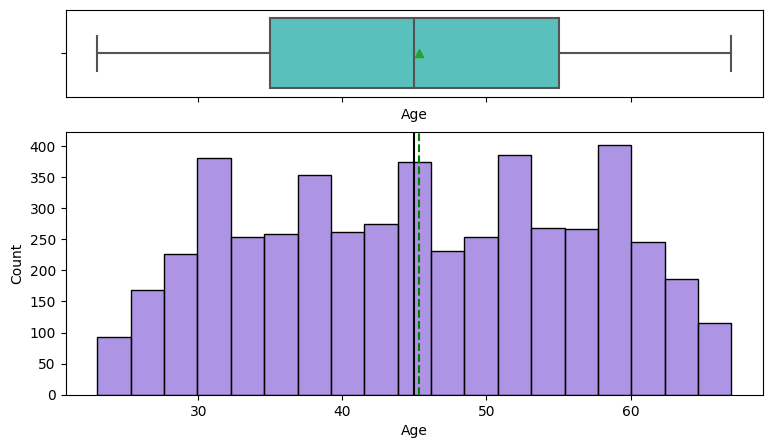

In [15]:
histogram_boxplot(data = df, feature = "Age")

**Observations**

- The age variable is fairly distributed, No outliers

##### ***Experience*** 

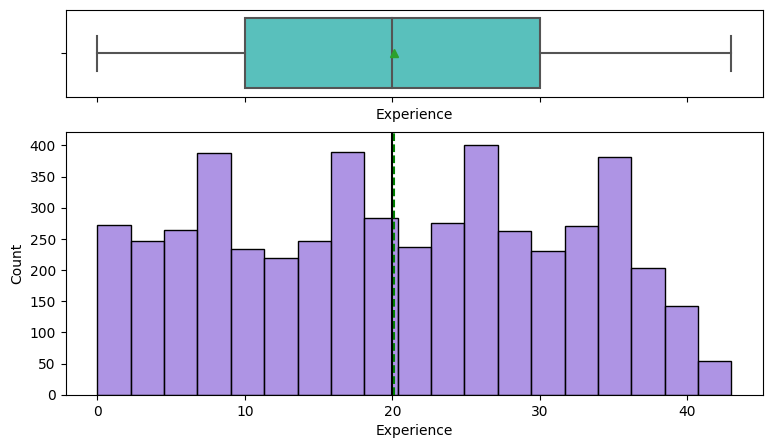

In [17]:
histogram_boxplot(data = df, feature = "Experience")

**Observations**

- The Experience variable is fairly distributed, No outliers

##### ***Income*** 

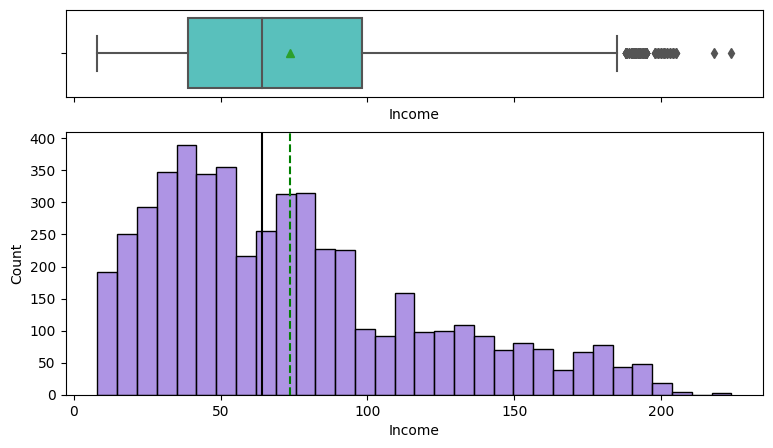

In [18]:
histogram_boxplot(data = df, feature = "Income")

**Observations**

- The Income variable is right skewed with lots of outliers at the upper end

##### ***Spending on credit card per month*** 

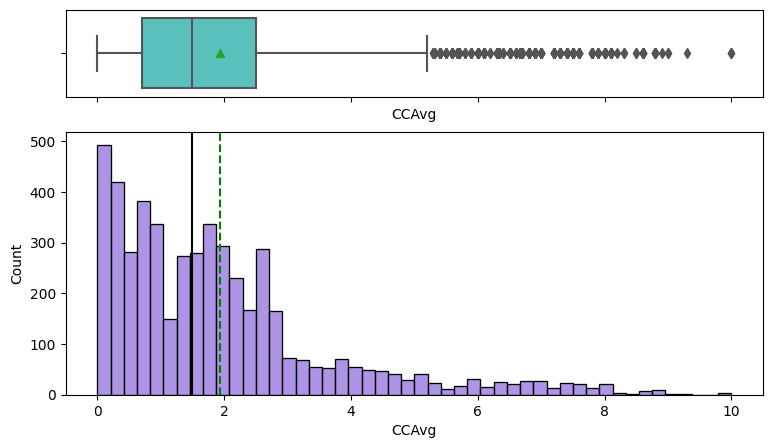

In [19]:
histogram_boxplot(data = df, feature = "CCAvg")

**Observations**

- The spending on credit card variable is right skewed with lots of outliers at the upper end

##### ***Value of Mortgage*** 

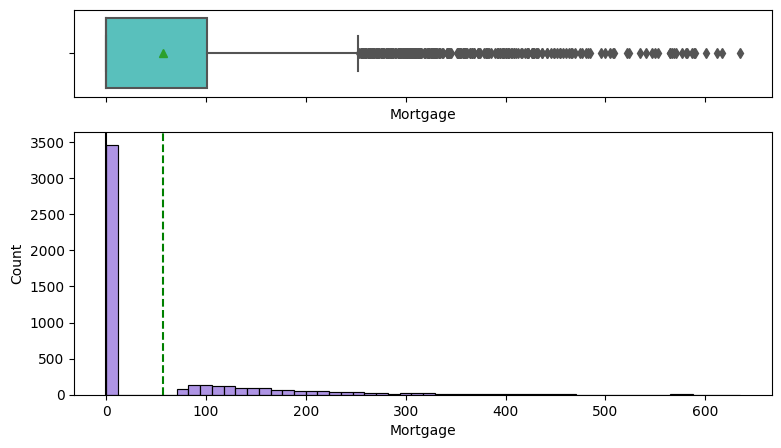

In [20]:
histogram_boxplot(data = df, feature = "Mortgage")

**Observations**

- The value of mortgage shows that more than **60%** has little to no investment in mortage

#### Categorical Plots

##### ***Family size of customer*** 

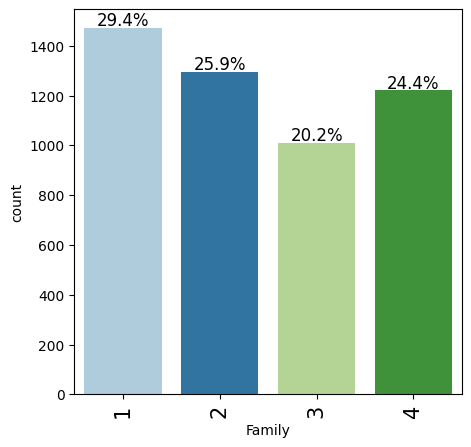

In [21]:
labeled_barplot(df, "Family", perc=True)

**Observations**

- 29.4% are singles while about 70% associate with a family

##### ***Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional*** 

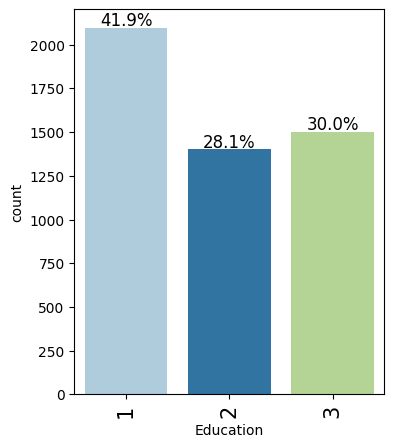

In [22]:
labeled_barplot(df, "Education", perc=True)

**Observations**

- 41.9% are student, hence the campaign should be targeted at remaianing 58% because they are the potential earners

##### ***Securities_Account: Does the customer have securities account with the bank?*** 

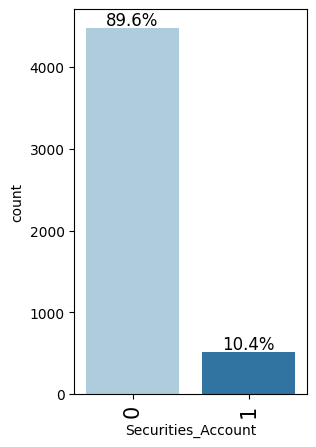

In [23]:
labeled_barplot(df, "Securities_Account", perc=True)

**Observations**

- 89.6% did not have security account with the bank
- 10.4% have security account with the bank

##### ***CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?*** 

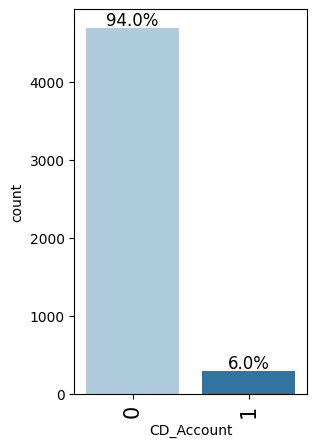

In [24]:
labeled_barplot(df, "CD_Account", perc=True)

**Observations**

- 94.0% did not have Certificate of Deposit with the bank
- 6.0% have Certificate of Deposit with the bank

##### ***Online: Do customers use internet banking facilities?*** 

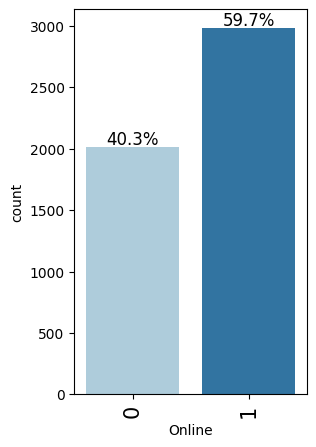

In [25]:
labeled_barplot(df, "Online", perc=True)

**Observations**

- 40.3% do not use Internet banking facilities
- 59.7% use the Internet banking faciliteis

##### ***CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?*** 

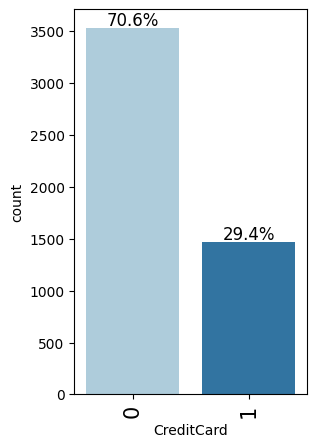

In [26]:
labeled_barplot(df, "CreditCard", perc=True)

**Observations**

- 70.6% use credit card used by other banks
- 29.4% don't have credit card from other banks

##### This is the target variable
##### ***Personal_Loan -  Did this customer accept the personal loan offered in the last campaign?*** 


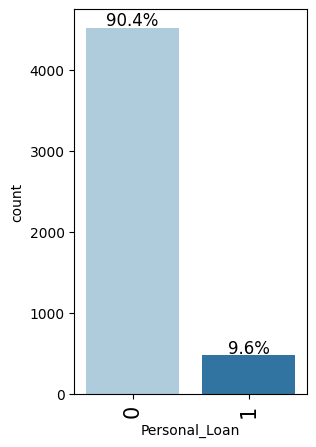

In [27]:
labeled_barplot(df, "Personal_Loan", perc=True)

**Observations**

- 90.4% did not accept the personal loan campaign and that represent **0** in our classificaiton
- 9.6% accepted the load offer. This is minority class and that represent **1** in our classification

### Bivariate Analysis 

##### Corellation Plot among the variables

In [28]:
# rearrange the columns
df = df.reindex(columns=['Personal_Loan',
                         'Age',
                         'Experience',
                         'Income',
                         'ZIPCode',
                         'Family',
                         'CCAvg',
                         'Education',
                         'Mortgage',
                         'Securities_Account',
                         'CD_Account',
                         'Online',
                         'CreditCard'])

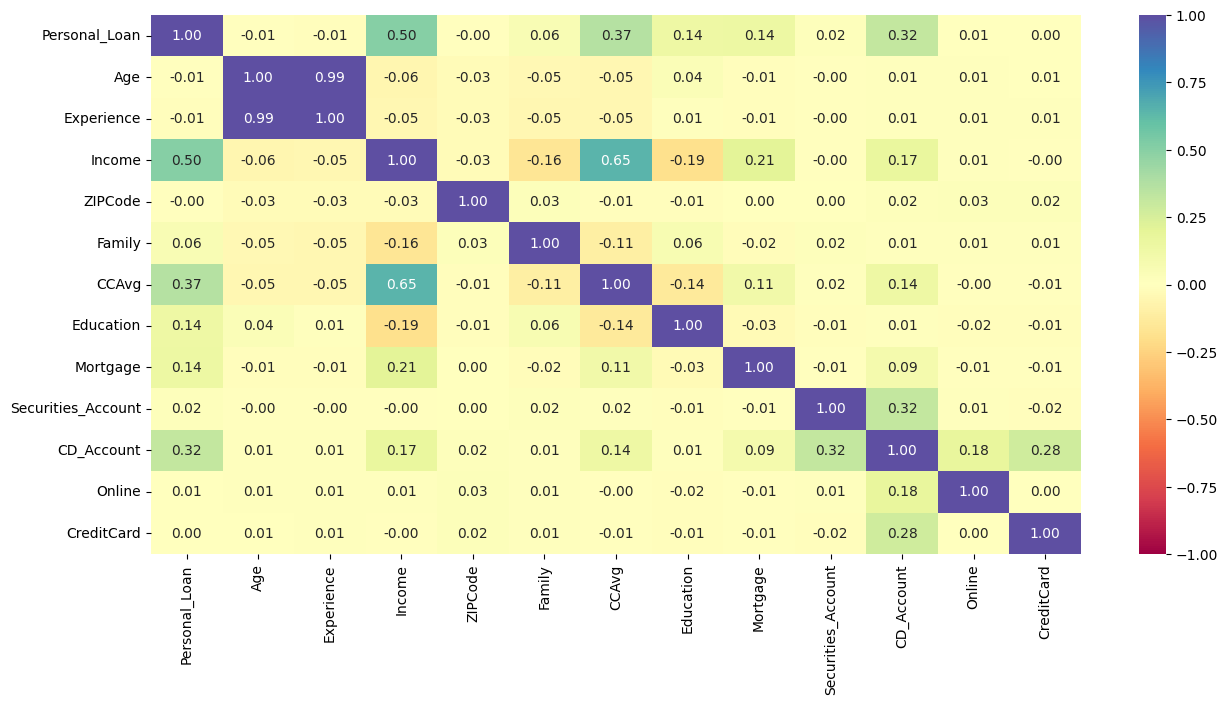

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- **Personal_Loan** is moderately positively correlated with **Annual Income of customer** (0.50), **Average spending on card** (0.37), and **customer who has Certificate of depoist** (0.32).
- **Customer age** and **the years of Experience beds** have high positive correlation.(0.99)
- **Customer that earns more** spends more **CCAvg**(0.65)


##### ***Personal Loan* vs *Income*** 

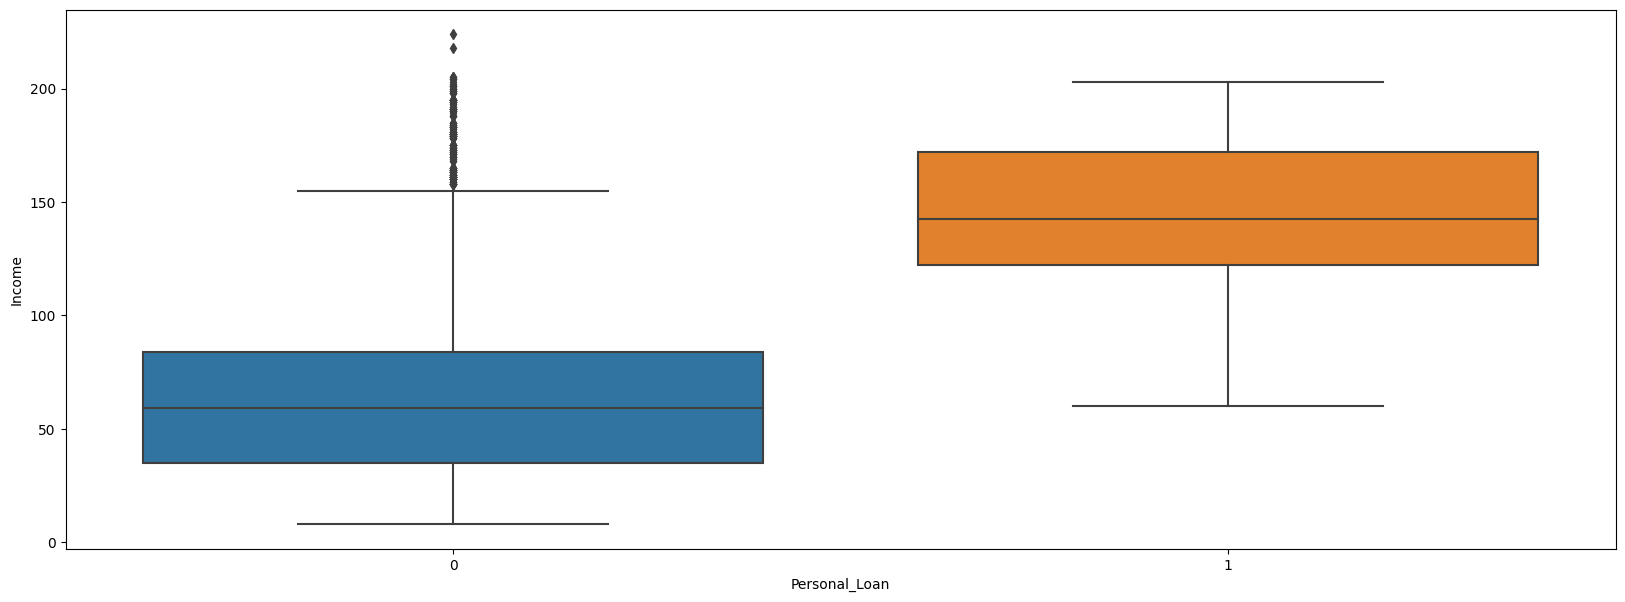

In [30]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="Personal_Loan", y="Income", data=df,)
plt.show()

**Observations**

- People whose income are higher tends to buy personal loan compared to low income earner

##### ***Personal Loan* vs *Average spending on card*** 

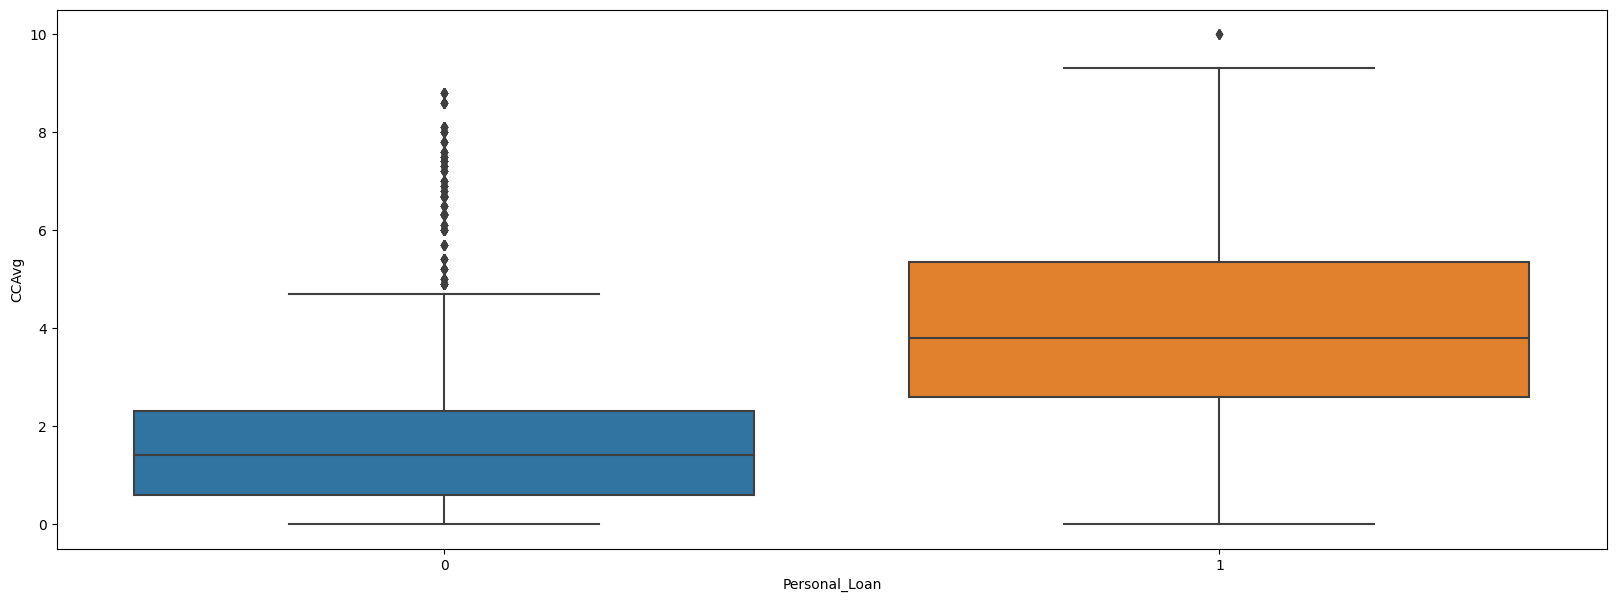

In [31]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="Personal_Loan", y="CCAvg", data=df,)
plt.show()

**Observations**

- People whose spends more on credit card tends to buy personal loan compared to those who don't use credit card

##### ***Experience* vs *Age*** 

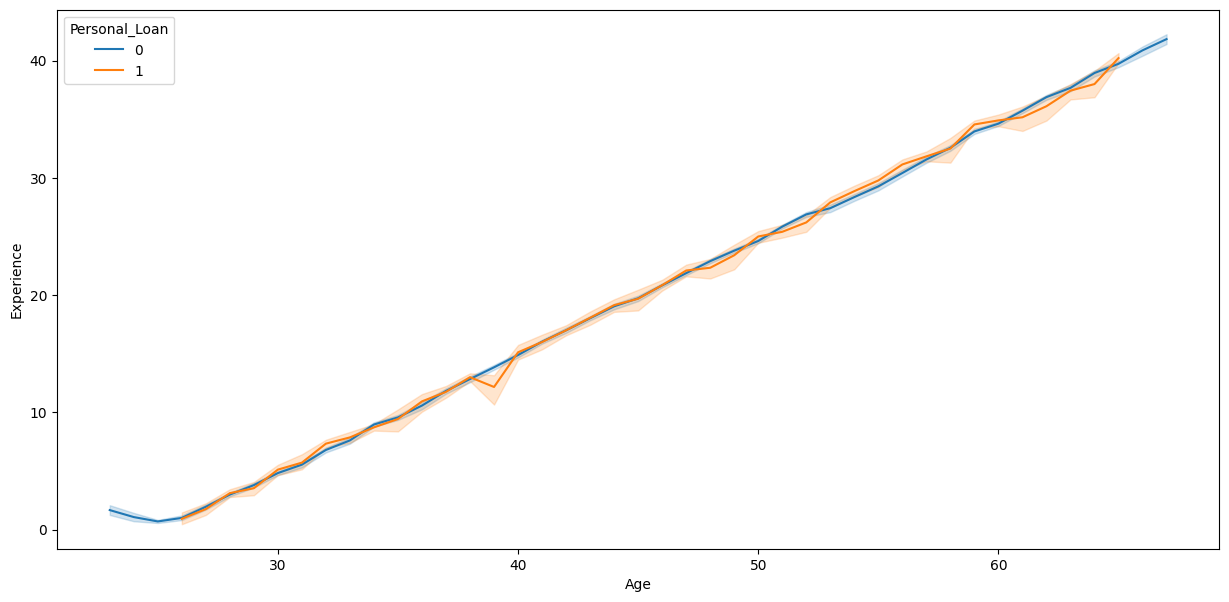

In [32]:
plt.figure(figsize=(15, 7))
sns.lineplot(y="Experience", x="Age", hue="Personal_Loan", data=df)
plt.show()

**Observations**

- As you grow in Age you get more experience in your choosen profession

## Data Preprocessing

### Outlier Detection

- Let's check for outliers in the data.

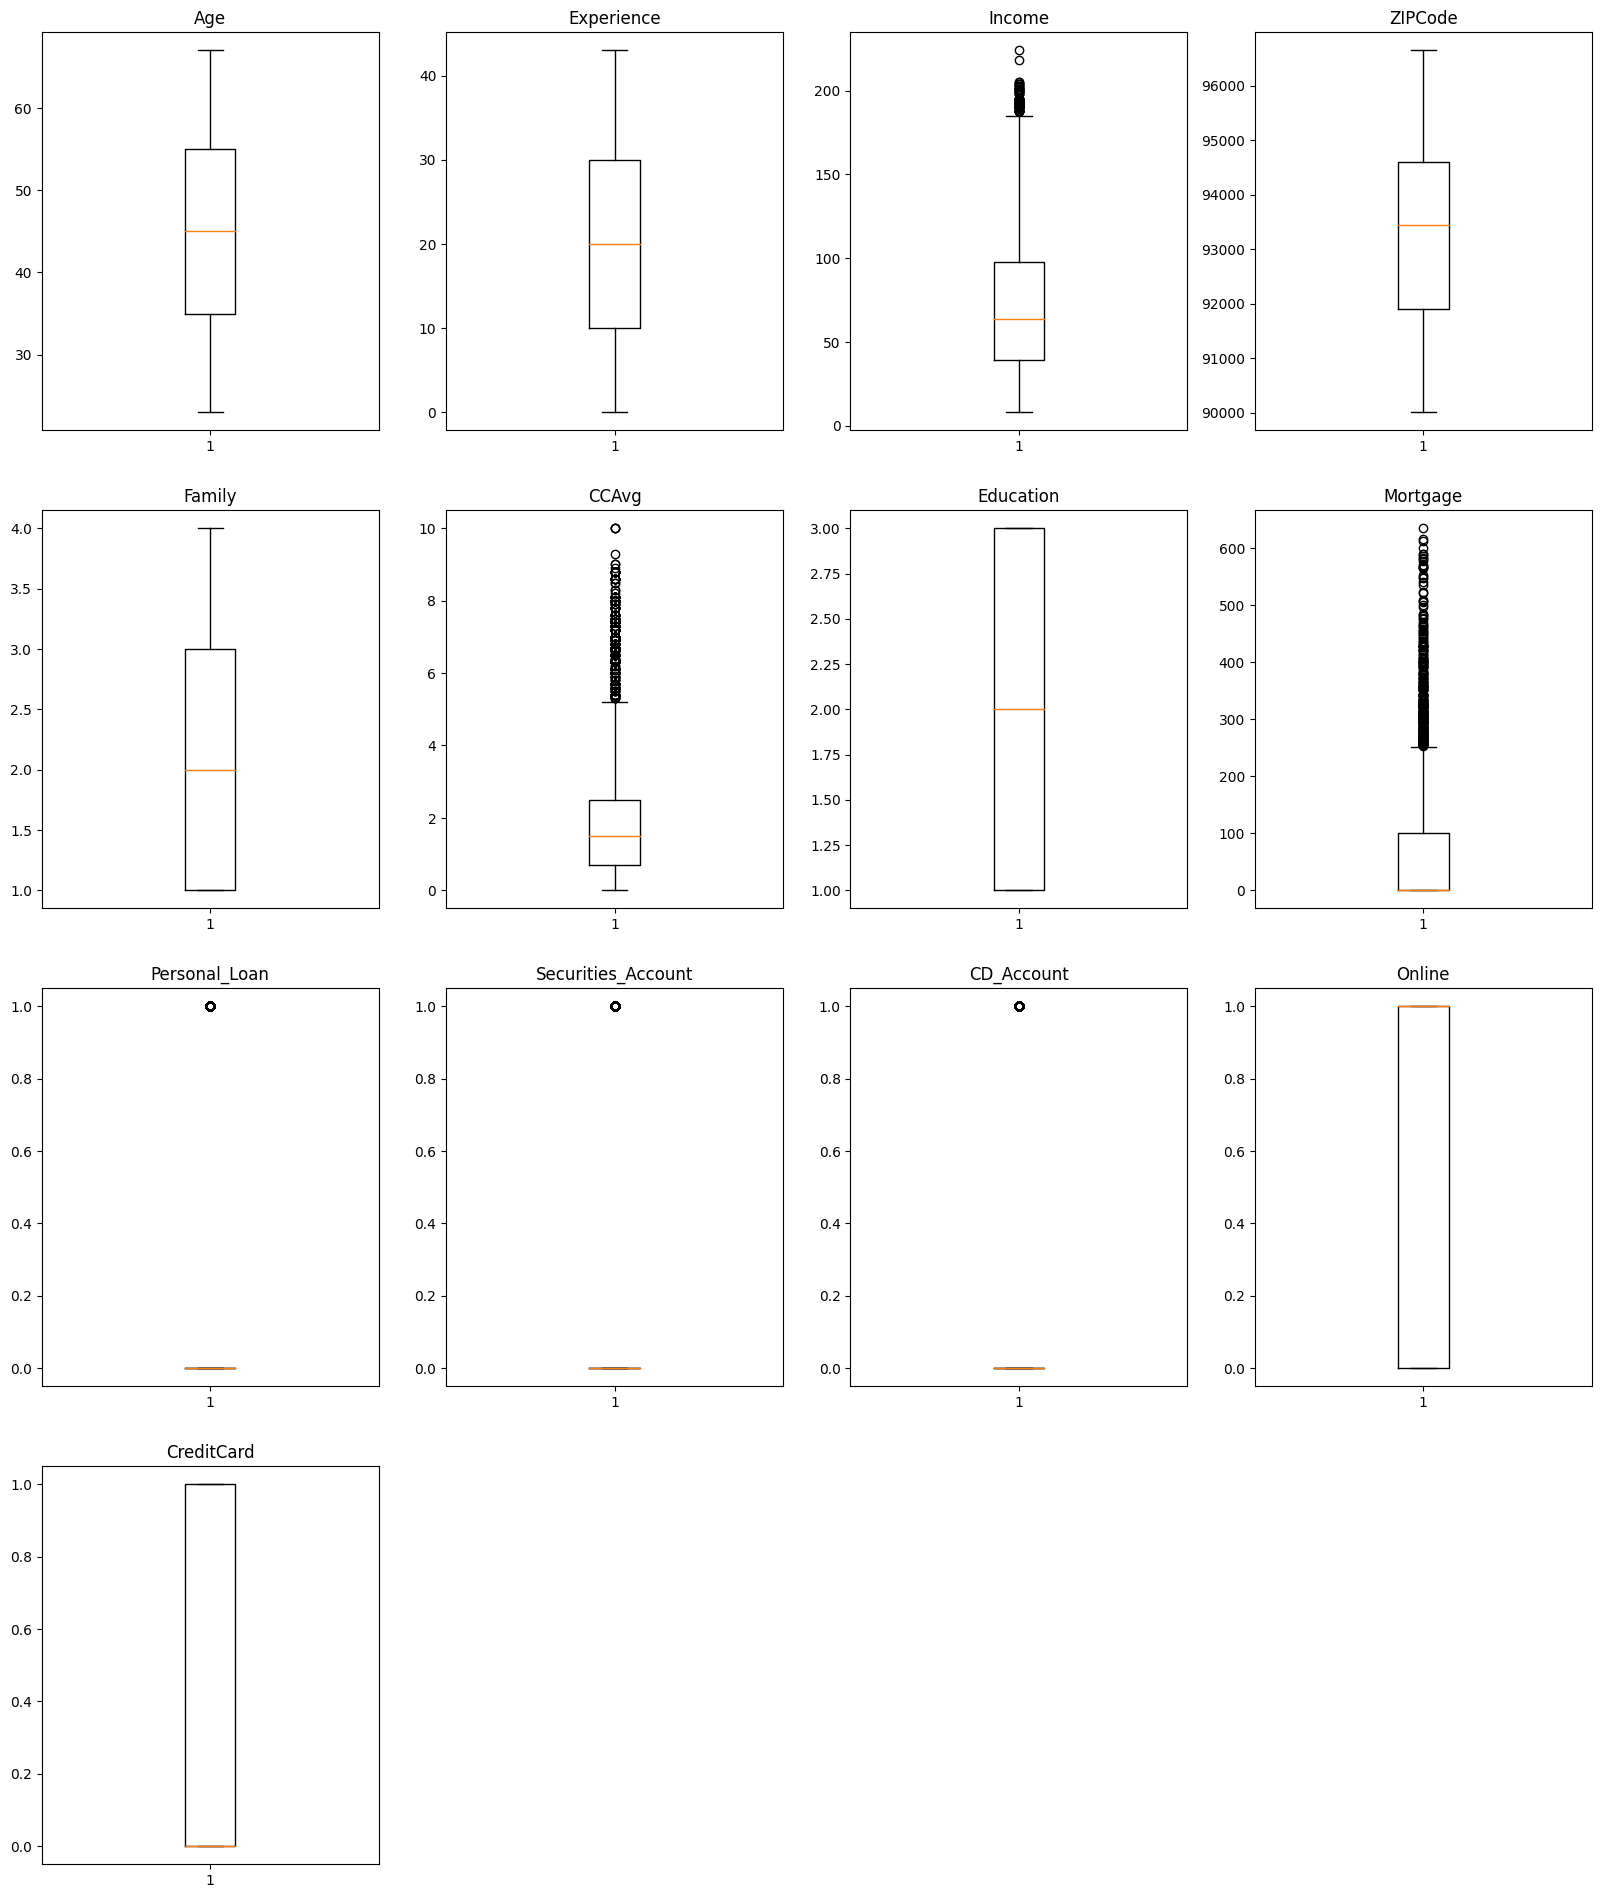

In [33]:
# outlier detection using boxplot
# use the numeric columns we created above
plt.figure(figsize=(20, 30))

for i, variable in enumerate(cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

**Observations**

- Income: Annual income of the customer (in thousand dollars),
- Mortgage: Value of house mortgage if any. (in thousand dollars),
- CCAvg: Average spending on credit cards per month (in thousand dollars)
    all have upper outliers

### Outlier Treatment

- Let's treat all the outliers by flooring and capping.

In [34]:
# illustrate clipping values to minimum and maximum

l1 = [-200, 5, 0, 1000]

# use np.clip function

features_with_outliers = ['Income', 'Mortgage', 'CCAvg']


In [35]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [36]:
# treating the outliers

df = treat_outliers_all(df, features_with_outliers)

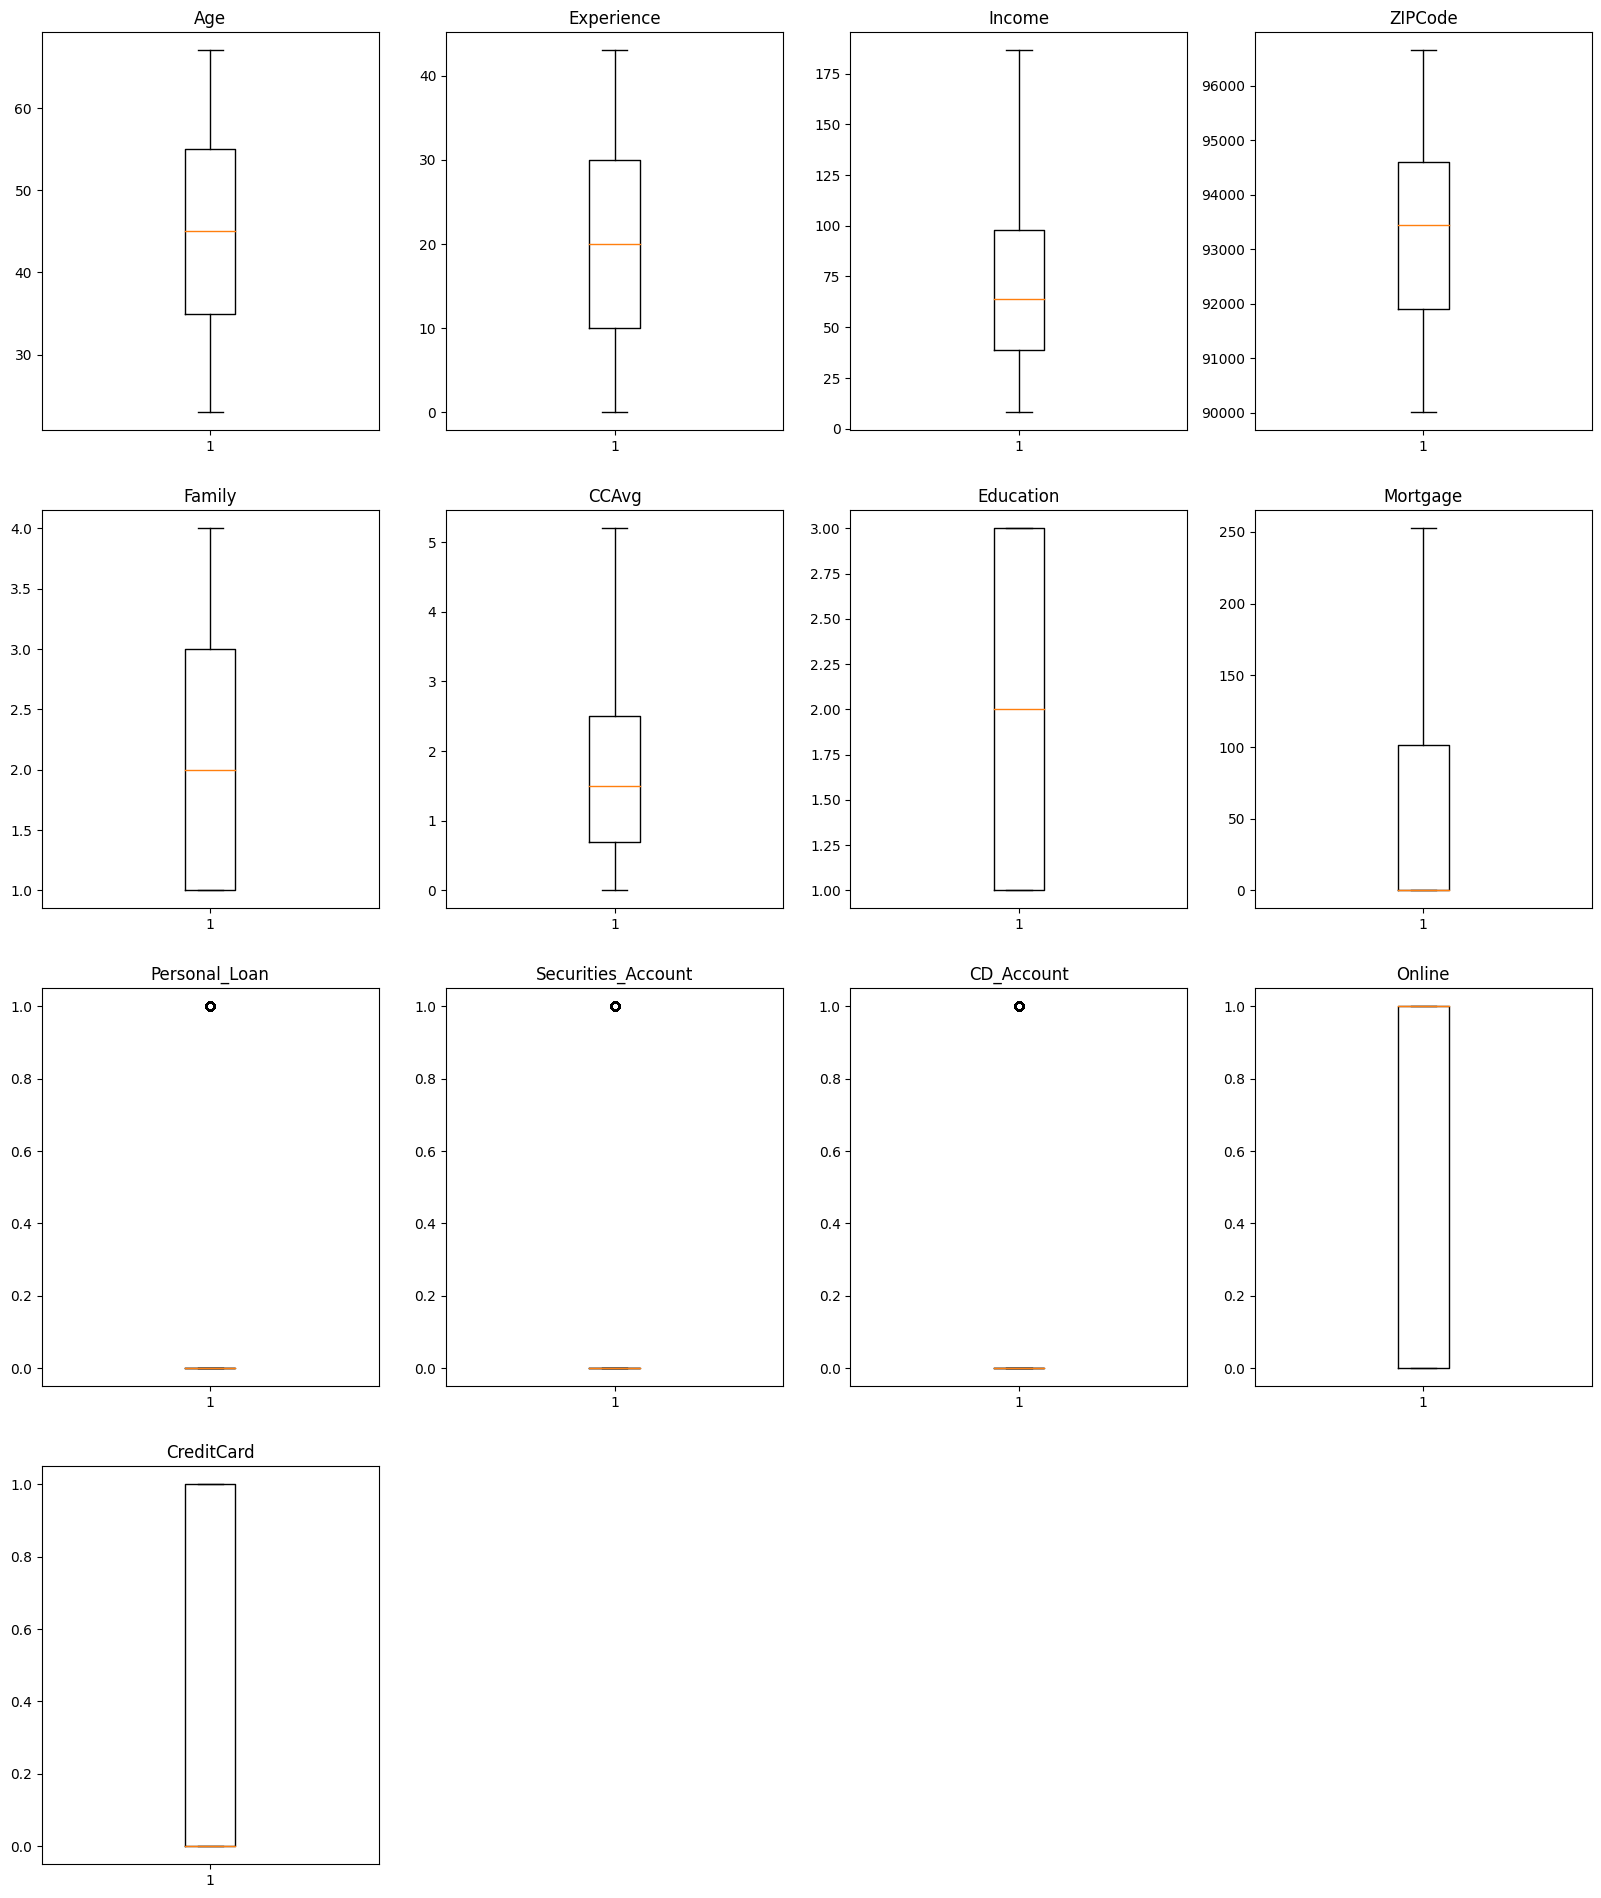

In [37]:
# outlier detection using boxplot
# use the numeric columns we created above
plt.figure(figsize=(20, 30))

for i, variable in enumerate(cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

## Model Development

### Spliting the data 
We will use 80% of data for training and 20% for testing.

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

### Lets check split of data

In [39]:
# split into train, validation and test with stratification

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0, stratify=y_train_val)

# Print the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3200, 12) (3200,)
Validation set shape: (800, 12) (800,)
Testing set shape: (1000, 12) (1000,)


### Data Normalization/Scaling

In [40]:
# Instantiate StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform it
X_train_sc = scaler.fit_transform(X_train)

# Transform validation data
X_val_sc = scaler.transform(X_val)

# Transform test data
X_test_sc = scaler.transform(X_test)

## Using Cross Validation, check the average recall score
## The objective of this project is to optimize for recall

In [41]:
log_reg = LogisticRegression(random_state=0)


score = cross_val_score(log_reg, X, y, scoring="recall", cv=5)

score

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.3125    , 0.36458333, 0.42708333, 0.57291667, 0.53125   ])

In [42]:
np.mean(score)

0.4416666666666666

**Observations**

- We are optimizing for recall, hence the based recall is 44.1%

## Model Development & Evaluation

### Using Logistic Regression to build model

In [43]:
from model import train, evaluate

In [44]:
## train model

log_reg_model = train(log_reg, X_train_sc, y_train)

Train Accuracy: 0.95625


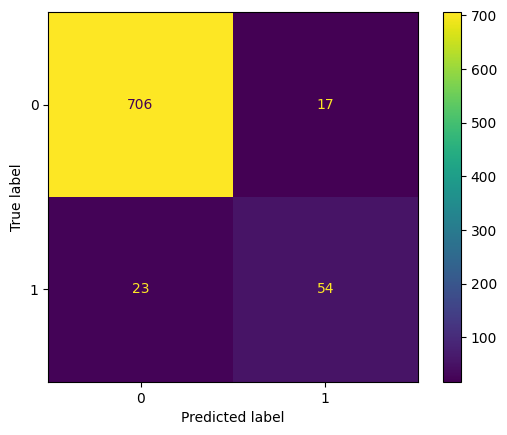

,Accuracy,Recall,Precision,F1
0,0.95,0.701299,0.760563,0.72973


In [45]:
## Evaluate model on evaluation dataset

log_reg_df = evaluate(log_reg_model, X_val_sc, y_val)

log_reg_df

#### Interpretation
- Accuracy: This model would predict correctly if a customer would buy a personal loan 95% of the time
- Recall: Considering only the positive class(Class 1), how many did the model predicted correctly to buy the personal loan. That is 70% TP/(TP+FN)
- Precision: Out of all the people our model predicted to purchase the personal loan only 76% has bought it TP/(TP+FP)
- F1: its the combination of both Precision and Recall

- The model predicted that **54** would buy the loan  and they bought **(TP)**
- The model predicted that **706** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **23** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **17** would  buy the loan and they did not buy **(FP)**

**We intend to reduce the False Negative(FN) error i.e. optimize the recall because there's is no provision for this 23 people that want to collect loan. The customer would loose faith in our service after the campaign and may find alternative. hence the need to optimise for recall**

## Model Improvement
1.  Improve the model using its metrics a case of **ROC - AUC**: We already know that the default threshold is 0.5 ROC_Curve gives varying threshould which can be used to the hightest value of (TPR -FPR) which give a distinct classification.
2.  Using Model Hyper parameter tunning
3.  Using data adjustment **Balancing the data**

### 1. ROC - AUC

- ROC - Reciever Operating Characteristics. ROC stands for Receiver Operating Characteristic, which is a curve used to evaluate the performance of binary classification models. It is a graphical representation of the relationship between the true positive rate (TPR) and false positive rate (FPR) at different thresholds for the predicted probabilities of the positive class
- AUC - Area Under the Curve(ROC Curve)

In [46]:
from draw_roc import draw_roc_curve


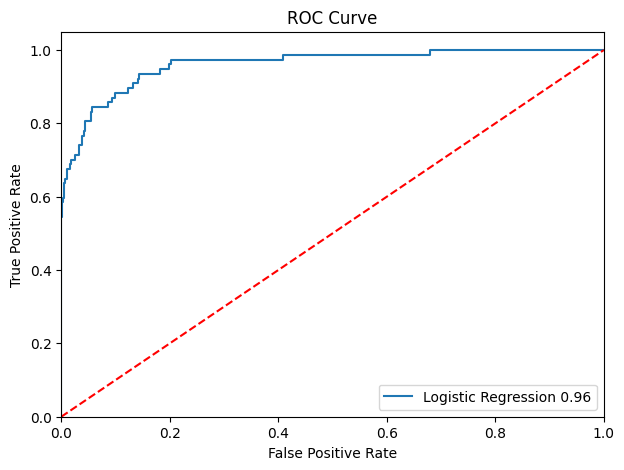

In [47]:

tpr, fpr, thres = draw_roc_curve(log_reg_model, X_val_sc, y_val)

In [48]:
optimal_idx = np.argmax(fpr - tpr)


optimal_thres = thres[optimal_idx]

optimal_thres

0.06976276957265676

### Evaluate our model using the new threshold

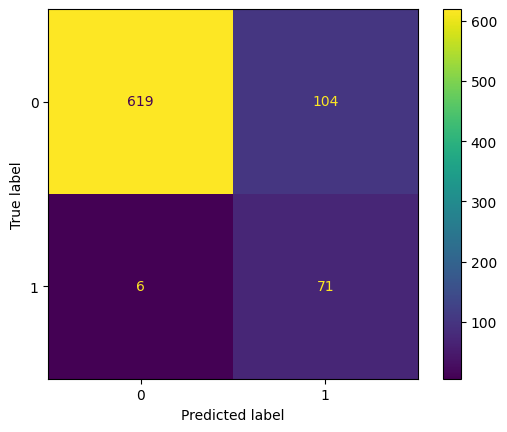

,Accuracy,Recall,Precision,F1
0,0.8625,0.922078,0.405714,0.563492


In [49]:
evaluate(log_reg_model, X_val_sc, y_val, threshold=optimal_thres)



#### Interpretation
- Accuracy: This model would predict correctly if a customer would buy a personal loan 86.2% of the time
- Recall: Considering only the positive class(Class 1), how many did the model predicted correctly to buy the personal loan. That is 92.2% TP/(TP+FN) this is an increase compared to the 70% earlier recorded
- Precision: Out of all the people our model predicted to purchase the personal loan only 40.5% has bought it TP/(TP+FP). this is a reduction compared to 76% earlier recorded but the trade-off is acknowledged
- F1: its the combination of both Precision and Recall

- The model predicted that **71** would buy the loan  and they bought **(TP)**
- The model predicted that **619** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **6** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **104** would  buy the loan and they did not buy **(FP)**

**We have reduce the False Negative(FN) error from 23 to 6. However this had made us made excess provision for 104 customer that we think would buy but ended up not buying**

### 2. Model Hyperparameter tunning

In [51]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid = { 'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# instantiate the models
log_reg = LogisticRegression(random_state=0)

grid = GridSearchCV(log_reg, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(X_train_sc, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\AppData\Local\Programs\Python

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [52]:
log_reg_bp = grid.best_params_
log_reg_bp

{'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}

In [53]:
## retrain the model using the best parameter

log_reg_gs = LogisticRegression(random_state=0, **log_reg_bp)

## train model

log_reg_model_gs = train(log_reg_gs, X_train_sc, y_train)




Train Accuracy: 0.95625


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


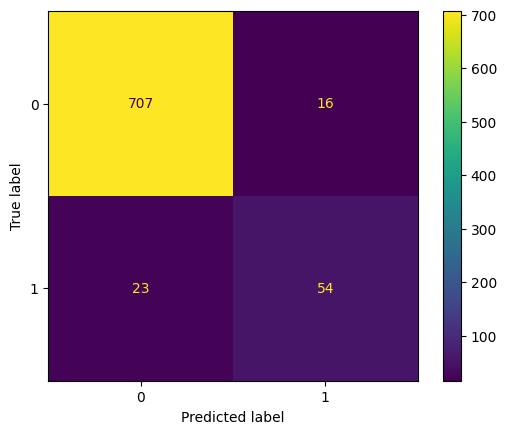

,Accuracy,Recall,Precision,F1
0,0.95125,0.701299,0.771429,0.734694


In [54]:
## Evaluate model on evaluation dataset

log_reg_gs = evaluate(log_reg_model_gs, X_val_sc, y_val)

log_reg_gs

#### Interpretation
- After using the best parameter following the hyper parameter tunning the result is not different from the default hyper parameter earlier used

### 3. Model improvement using Data. Balancing the data

In [55]:
## import libraries

from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [56]:
## function to balance data

def balance_data(X, y, smote_type ):
    """
    X: Train features
    y: Train target
    smote_type: The imbalance strategy
    
    """
    
    X_res, y_res = smote_type.fit_resample(X, y)    
    
    return X_res, y_res

In [57]:
under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderdline = BorderlineSMOTE(random_state=0)
adasyn = ADASYN(random_state=0)

X_train_un, y_train_un = balance_data(X_train_sc, y_train, under)
X_train_ov, y_train_ov = balance_data(X_train_sc, y_train, over)
X_train_sm, y_train_sm = balance_data(X_train_sc, y_train, smote)
X_train_bdl, y_train_bdl = balance_data(X_train_sc, y_train, borderdline)
X_train_ada, y_train_ada = balance_data(X_train_sc, y_train, adasyn)

### Train the model for each smote type

**using undersampling**

Train Accuracy: 0.8859934853420195


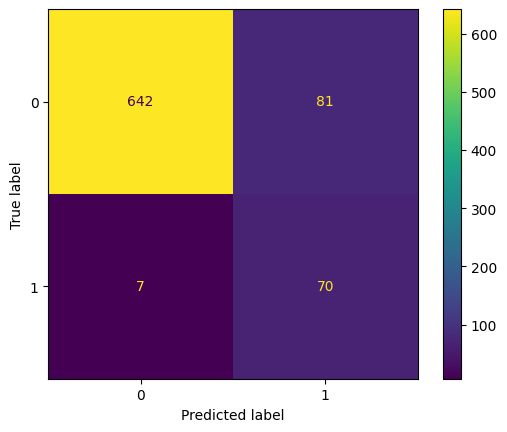

,Accuracy,Recall,Precision,F1
0,0.89,0.909091,0.463576,0.614035


In [58]:
log_reg_un = train(log_reg, X_train_un, y_train_un)

evaluate(log_reg, X_val_sc, y_val)

**over undersampling**

Train Accuracy: 0.8945731075008642


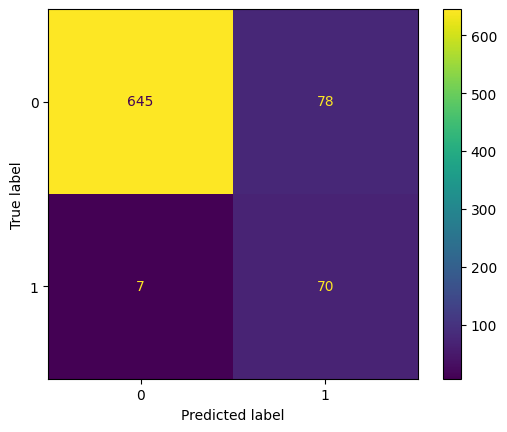

,Accuracy,Recall,Precision,F1
0,0.89375,0.909091,0.472973,0.622222


In [59]:
log_reg_ov = train(log_reg, X_train_ov, y_train_ov)

evaluate(log_reg, X_val_sc, y_val)

**Smote sampling**

Train Accuracy: 0.9128931904597304


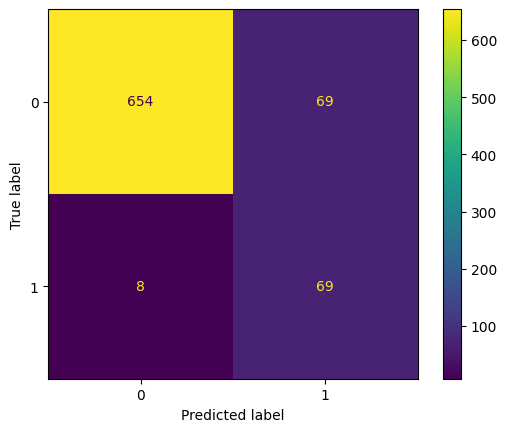

,Accuracy,Recall,Precision,F1
0,0.90375,0.896104,0.5,0.64186


In [60]:
log_reg_sm = train(log_reg, X_train_sm, y_train_sm)

evaluate(log_reg, X_val_sc, y_val)

**Borderline SMOTE sampling**

Train Accuracy: 0.899930867611476


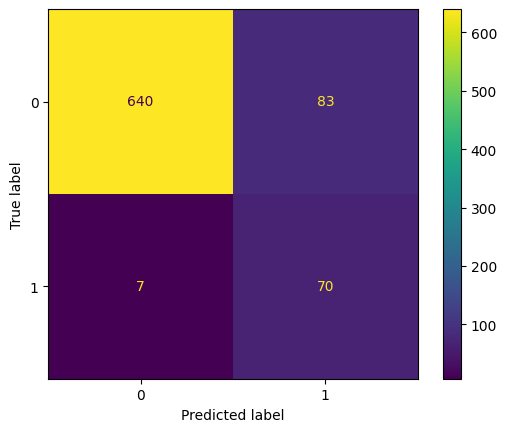

,Accuracy,Recall,Precision,F1
0,0.8875,0.909091,0.457516,0.608696


In [61]:
log_reg_bdl = train(log_reg, X_train_bdl, y_train_bdl)

evaluate(log_reg, X_val_sc, y_val)

**ADASYN SMOTE sampling**

Train Accuracy: 0.8856056678762744


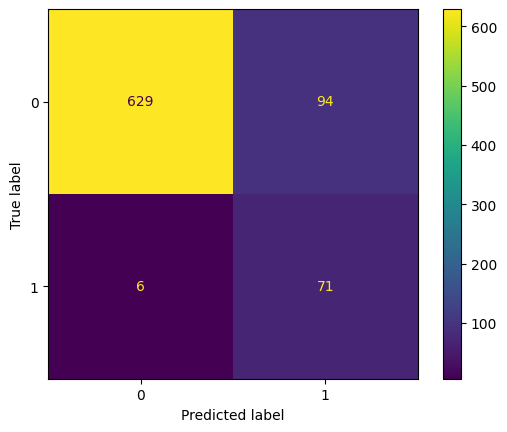

,Accuracy,Recall,Precision,F1
0,0.875,0.922078,0.430303,0.586777


In [62]:
log_reg_ada = train(log_reg, X_train_ada, y_train_ada)

evaluate(log_reg, X_val_sc, y_val)

#### Conclusion with Linear Regression
- Model improvement using data gave the best result as seen in the last design with ADASYN SMOTE. 
- Accuracy increase from 86.2% to 87.5% when compared to the using ROC - AUC metric
- Recall is thesame 92.2% when compared to the using ROC - AUC metric
- Precision increase 40.5% to 43% when compared to the using ROC - AUC metric
- F1: its the combination of both Precision and Recall

- The model predicted that **71** would buy the loan  and they bought **(TP)**
- The model predicted that **629** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **6** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **94** would  buy the loan and they did not buy **(FP)**

**We have optimised the FN and also optimised the FP from 104 to 94 errors**

**If I am to use a linear model I will optimize the model using ADASYN SMOTE**

### Using Decision Tree to build model

In [63]:
##import model

from sklearn.tree import DecisionTreeClassifier

In [64]:
#Instantiate model

dtree = DecisionTreeClassifier(random_state=0)

In [65]:
# Train model

dtree_model = train(dtree, X_train, y_train)

Train Accuracy: 1.0


**A clear case of overfitting**

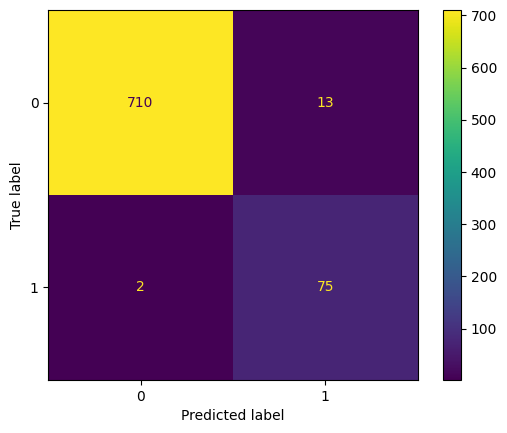

,Accuracy,Recall,Precision,F1
0,0.98125,0.974026,0.852273,0.909091


In [66]:
## Evaluate the trained model

dtree_evaluate = evaluate(dtree, X_val, y_val)
dtree_evaluate

### Applying pre-pruning strategy
- One possible way is to stop building the tree after a certain depth has been reached.
- Here we set max_depth=4, meaning only four consecutive questions can be asked.

In [67]:
# Apply pre-pruning by using max_depth of 4 for instance

dtree2 = DecisionTreeClassifier(random_state=0, class_weight={0: 0.1, 1:0.9}, max_depth=4)

# train the model
dtree2_model = train(dtree2, X_train, y_train)


Train Accuracy: 0.9509375


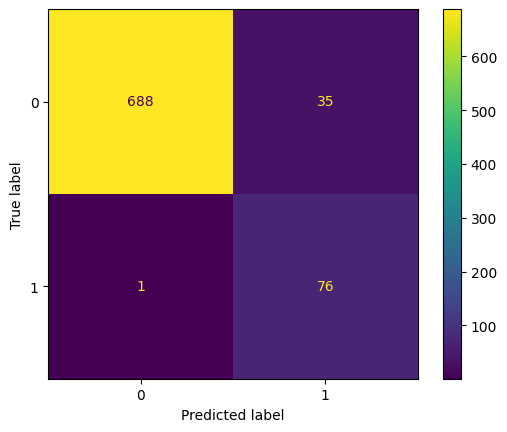

,Accuracy,Recall,Precision,F1
0,0.955,0.987013,0.684685,0.808511


In [68]:
# evaluate on the training and test set
dtree2_evaluate = evaluate(dtree2_model, X_val, y_val)
dtree2_evaluate

#### Conclusion with Decision Tree
- Applying pre-prunning to max depth of 4 and class-weight gave us better performance as compared to what what logistics regression gave us
- Accuracy increase from 87.5% to 95.5% when compared to the best result we got using Linear Model with optimization
- Recall increase from 92.2% to 98.7% when compared to the best result we got using Linear Model with optimization
- Precision increase from 43% to 68.4% when compared to the best result we got using Linear Model with optimization
- F1: its the combination of both Precision and Recall

- The model predicted that **76** would buy the loan  and they bought **(TP)**
- The model predicted that **688** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **1** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **35** would  buy the loan and they did not buy **(FP)**

**This is the best model so far**


###  Identify the key variables that have a strong relationship with the dependent

In [71]:
# Get the training column out as a list

feat_col = list(X.columns)
feat_col

['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [72]:
importances = dtree2_model.feature_importances_

def plot_importances(importances):
    indices = np.argsort(importances)

    plt.figure(figsize=(12,15))
    plt.title("Features Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feat_col[i] for i in indices])
    plt.show()

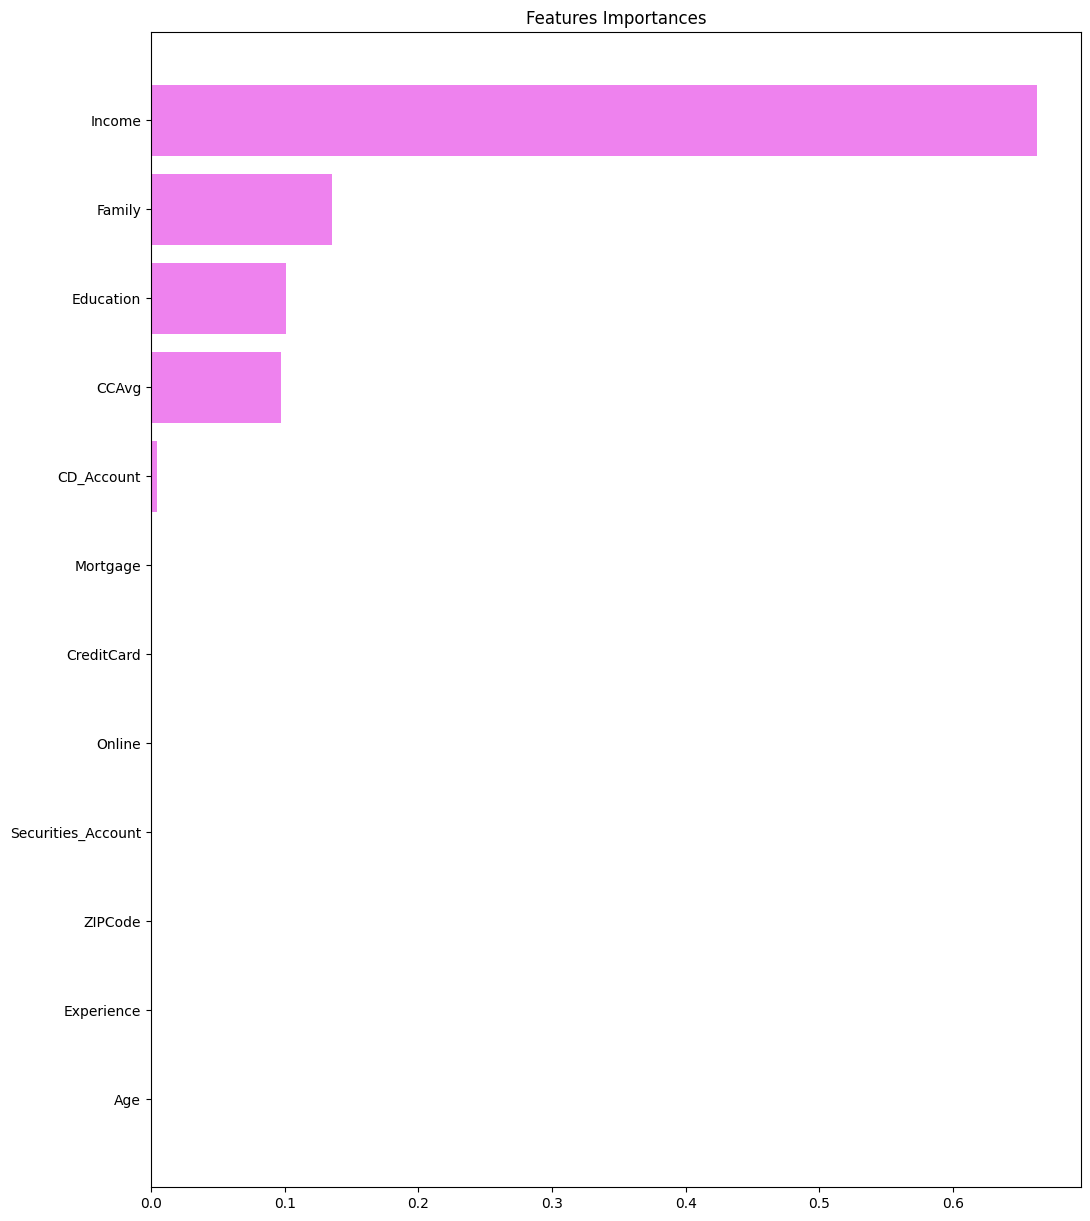

In [73]:
plot_importances(importances)

#### Insight
- the key variables that have a strong relationship with the dependent **Income**

### Using Random Forest to build model

In [74]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier

# instanntiate the classifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=4)

# train the model
rf_model = train(rf, X_train, y_train)

rf_model


Train Accuracy: 0.9621875


RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

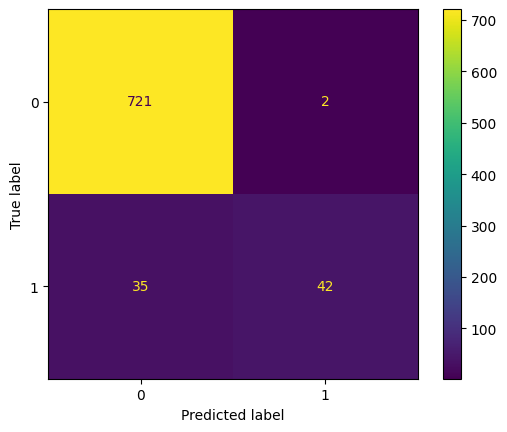

,Accuracy,Recall,Precision,F1
0,0.95375,0.545455,0.954545,0.694215


In [75]:
# performance scores
# evaluate on the training and test set
rf_evaluate = evaluate(rf_model, X_val, y_val)
rf_evaluate

### using hyper parameter tunning to get the best parameter

In [80]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid1 = { 'criterion' : ["gini", "entropy", "log_loss"],
                 'max_depth': [1, 2, 3, 4]}

# instantiate the models
rf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(rf, param_grid1, cv = 5, n_jobs = -1, scoring = "recall" )


# fit the grid search model on the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [81]:
rf_bp = grid.best_params_
rf_bp

{'criterion': 'gini', 'max_depth': 4}

In [82]:
## retrain the model using the best parameter

#Instatiate using the best parameter
rf_gs = RandomForestClassifier(random_state=0, **rf_bp)

## train model

rf_model_gs = train(rf_gs, X_train, y_train)



Train Accuracy: 0.9621875


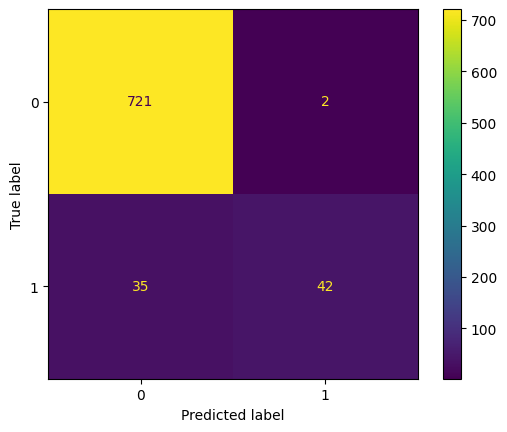

,Accuracy,Recall,Precision,F1
0,0.95375,0.545455,0.954545,0.694215


In [83]:
## Evaluate model on evaluation dataset

rf_evaluate_gs = evaluate(rf_model_gs, X_val, y_val)

rf_evaluate_gs

#### Conclusion with Random Forest

- The model predicted that **42** would buy the loan  and they bought **(TP)**
- The model predicted that **721** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **35** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **2** would  buy the loan and they did not buy **(FP)**

**This is the model is not good compared to the tree model**


###  Identify the key variables that have a strong relationship with the dependent

In [84]:
importances = rf_model_gs.feature_importances_

def plot_importances(importances):
    indices = np.argsort(importances)

    plt.figure(figsize=(12,15))
    plt.title("Features Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feat_col[i] for i in indices])
    plt.show()

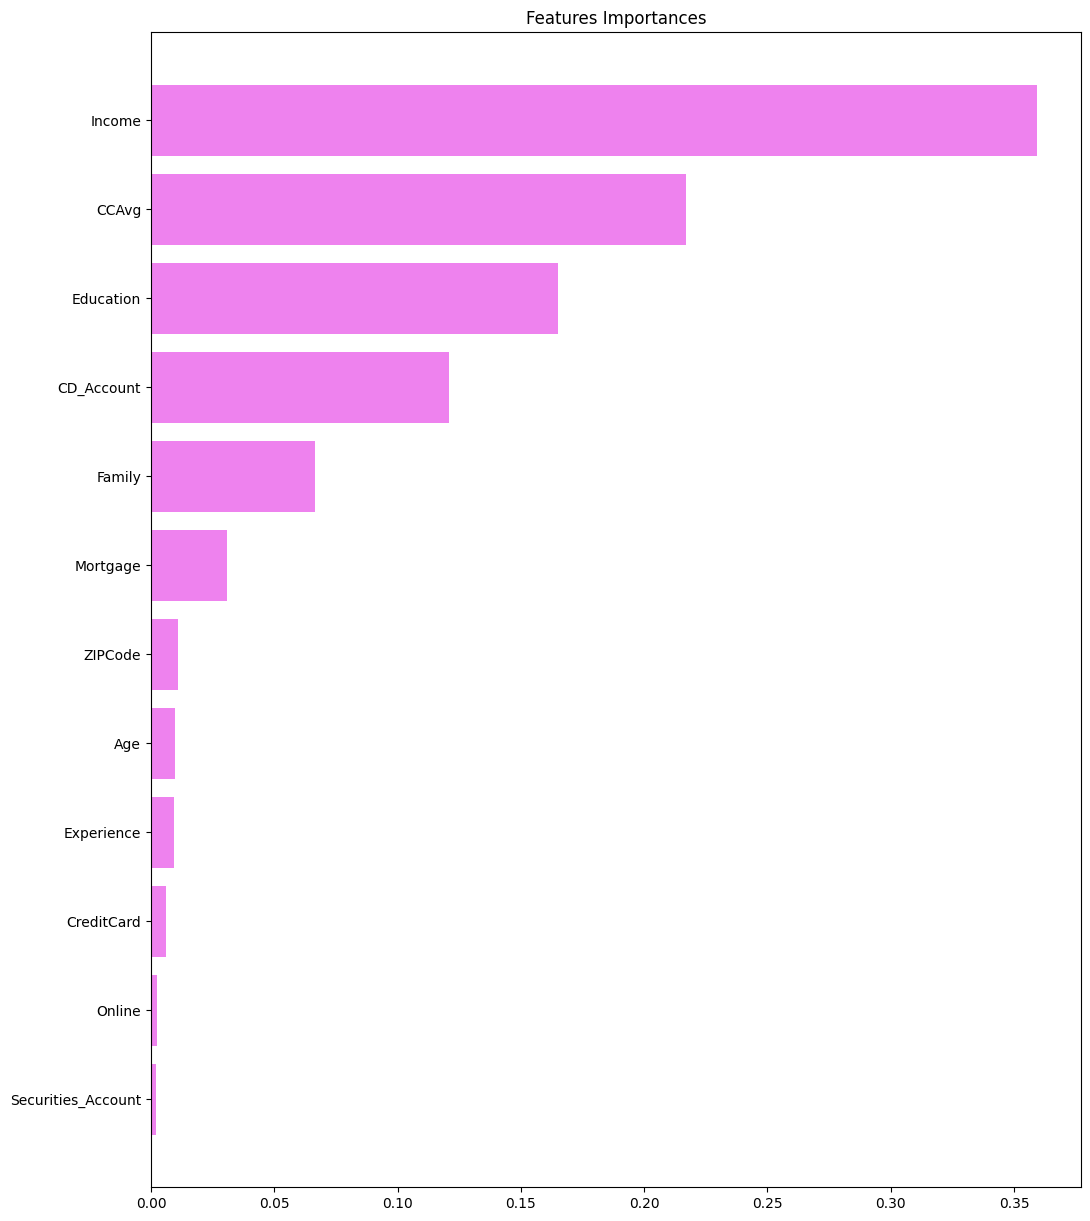

In [85]:
plot_importances(importances)

#### Insight
- the key variables that have a strong relationship with the dependent **Income**

### Using Gradient Boosting to build model

In [87]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
gb = GradientBoostingClassifier(random_state=0, max_depth=4)

# train the model
gb_model = train(gb, X_train, y_train)

gb_model



Train Accuracy: 1.0


GradientBoostingClassifier(max_depth=4, random_state=0)

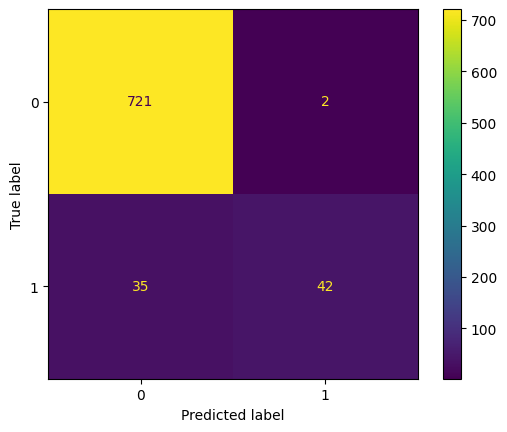

,Accuracy,Recall,Precision,F1
0,0.95375,0.545455,0.954545,0.694215


In [88]:
# performance scores
# evaluate on the training and test set
gb_evaluate = evaluate(rf_model, X_val, y_val)
gb_evaluate

### using hyper parameter tunning to get the best parameter

In [89]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid2 = { 'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                 'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
grid = GridSearchCV(gb, param_grid2, cv = 5, n_jobs = -1, scoring = "recall" )


# fit the grid search model on the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [90]:
gb_bp = grid.best_params_
gb_bp

{'learning_rate': 1, 'max_depth': 3}

In [92]:
## retrain the model using the best parameter

#Instatiate using the best parameter
gb_gs = GradientBoostingClassifier(random_state=0, **gb_bp)

## train model

gb_model_gs = train(gb_gs, X_train, y_train)


Train Accuracy: 0.954375


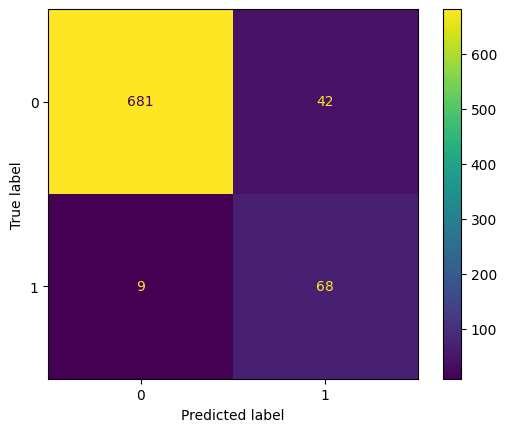

,Accuracy,Recall,Precision,F1
0,0.93625,0.883117,0.618182,0.727273


In [93]:
## Evaluate model on evaluation dataset

gb_evaluate_gs = evaluate(gb_model_gs, X_val, y_val)

gb_evaluate_gs

#### Conclusion with Gradient Boosting Classifier

- The model predicted that **68** would buy the loan  and they bought **(TP)**
- The model predicted that **681** would not buy the loan and  they did not buy **(TN)**
- The model made mistake in predicting that **9** would not buy the loan and they bought **(FN)**
- The model made mistake in predicting that **42** would  buy the loan and they did not buy **(FP)**

**The model is good but still cannot be compated to compared to the tree model**


###  Identify the key variables that have a strong relationship with the dependent

In [95]:
importances = gb_model_gs.feature_importances_

def plot_importances(importances):
    indices = np.argsort(importances)

    plt.figure(figsize=(12,15))
    plt.title("Features Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feat_col[i] for i in indices])
    plt.show()

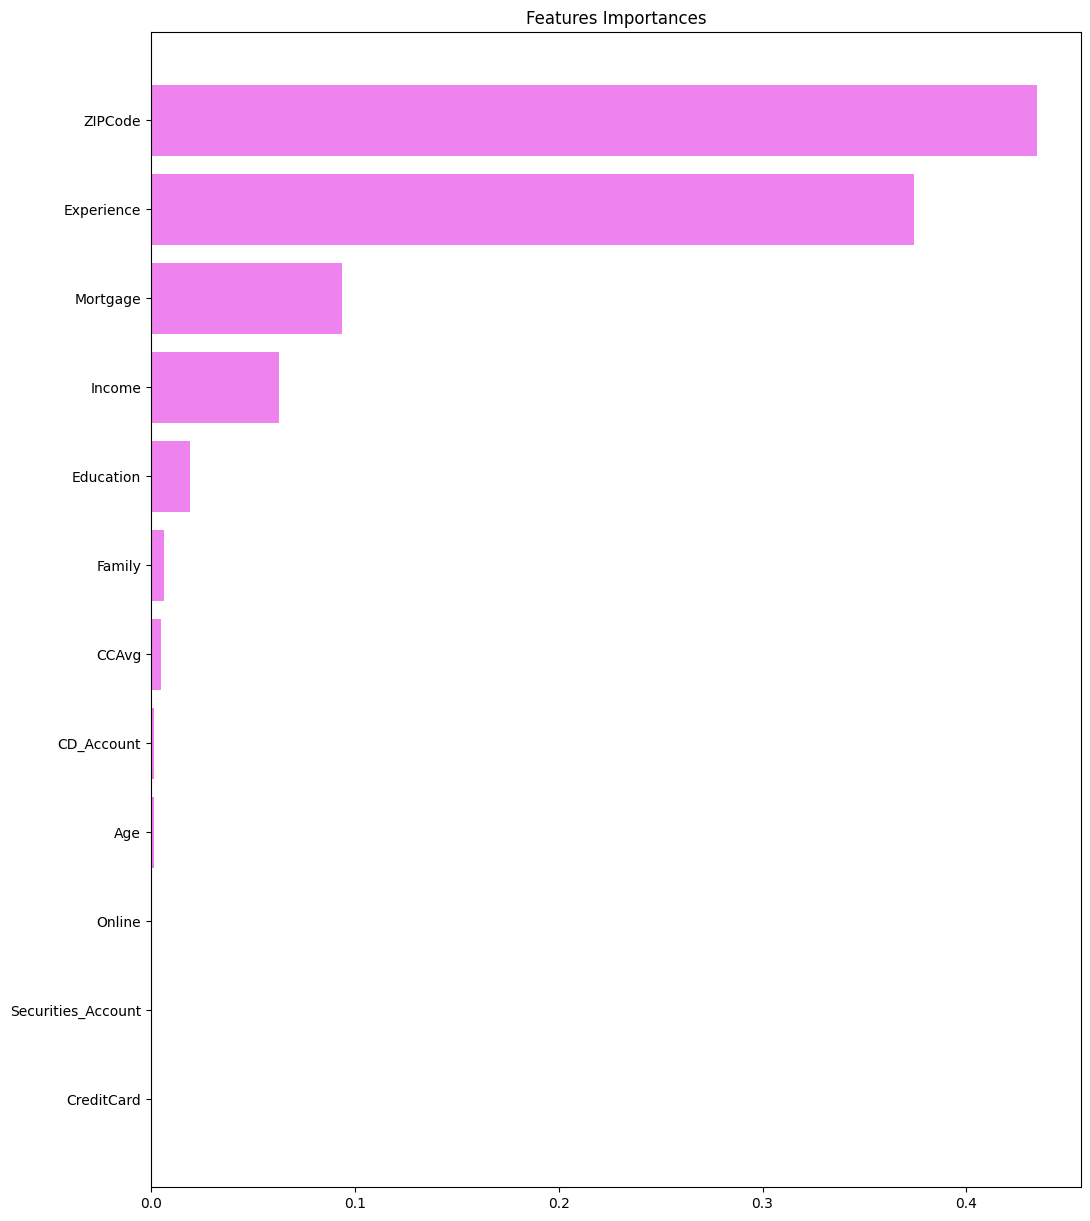

In [96]:
plot_importances(importances)

## Conclusion


- The Decision tree model gave the best result for the recall
- The Decision tree feature importance is the best 